In [1]:
# 기본 라이브러 데이타 불러오기
import pandas as pd
import seaborn as sns

# load_dataset 함수를 사용하여, 데이터프레임으로 변환
df =sns.load_dataset('titanic')

In [4]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [6]:
# python 디스플레이 설정 - 출력할 열의 개수 한도 늘리기
pd.set_option('display.max_columns', 15)

# df 데이터 확인
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [7]:
# 데이터 자료형 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [15]:
# 생존여부를 분류할 값으로 지정
target_data = df['survived']

In [36]:
df

,survived,pclass,sex,age,sibsp,parch,fare,...,who,adult_male,deck,embark_town,alive,alone,sex_num
0,0,3,male,22.0,1,0,7.2500,...,man,True,NaN,Southampton,no,False,0.0
1,1,1,female,38.0,1,0,71.2833,...,woman,False,C,Cherbourg,yes,False,1.0
2,1,3,female,26.0,0,0,7.9250,...,woman,False,NaN,Southampton,yes,True,1.0
3,1,1,female,35.0,1,0,53.1000,...,woman,False,C,Southampton,yes,False,1.0
4,0,3,male,35.0,0,0,8.0500,...,man,True,NaN,Southampton,no,True,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,...,man,True,NaN,Southampton,no,True,0.0
887,1,1,female,19.0,0,0,30.0000,...,woman,False,B,Southampton,yes,True,1.0
888,0,3,female,NaN,1,2,23.4500,...,woman,False,NaN,Southampton,no,False,1.0
889,1,1,male,26.0,0,0,30.0000,...,man,True,C,Cherbourg,yes,True,0.0


In [58]:
# 'sex_num'컬럼을 생성하여 성별의 남성을 '0', 여성을 '1'로 변환
df.loc[df['sex'] == 'male', 'sex_num'] = 0
df.loc[df['sex'] == 'female', 'sex_num'] = 1

In [45]:
# 'pclass'를 1등, 2등, 3등 컬럼으로 각각 생성하여 one-hot인코딩 진행
df['p1_class'] = df['pclass'] == 1
df['p2_class'] = df['pclass'] == 2
df['p3_class'] = df['pclass'] == 3

In [48]:
# 변환한 데이터 확인
df[['sex_num', 'p1_class', 'p2_class', 'p3_class']]

,sex_num,p1_class,p2_class,p3_class
0,0.0,False,False,True
1,1.0,True,False,False
2,1.0,False,False,True
3,1.0,True,False,False
4,0.0,False,False,True
...,...,...,...,...
886,0.0,False,True,False
887,1.0,True,False,False
888,1.0,False,False,True
889,0.0,True,False,False


In [ ]:
feature_data1 = df[['pclass', 'sex_num']]
feature_data1

In [49]:
feature_data2 = df[['p1_class', 'p2_class', 'p3_class', 'sex_num']]
feature_data2

,p1_class,p2_class,p3_class,sex_num
0,False,False,True,0.0
1,True,False,False,1.0
2,False,False,True,1.0
3,True,False,False,1.0
4,False,False,True,0.0
...,...,...,...,...
886,False,True,False,0.0
887,True,False,False,1.0
888,False,False,True,1.0
889,True,False,False,0.0


In [72]:
# 머신러닝 훈련/테스트 데이터 분할 feature1 = pclass원본
from sklearn.model_selection import train_test_split
X_train, y_train, X_test, y_test = train_test_split(feature_data1, target_data, random_state=42)

In [57]:
# 분할한 데이터 모양 확인
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(668, 2)
(668,)
(223, 2)
(223,)


In [73]:
# 로지스틱 회귀 모델
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train, X_test)

print(lr.score(X_train, X_test))
print(lr.score(y_train, y_test))

0.7874251497005988
0.7847533632286996


In [75]:
df['survived']

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: survived, Length: 891, dtype: int64

In [81]:
print(lr.feature_names_in_)
print(lr.predict([[0, 1]]))

['pclass' 'sex_num']
[1]


c:\Users\CDL\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [87]:
# 머신러닝 훈련/테스트 데이터 분할 feature2 = pclass one-hot인코딩
from sklearn.model_selection import train_test_split
X_train, y_train, X_test, y_test = train_test_split(feature_data2, target_data, random_state=42)

In [88]:
# 로지스틱 회귀 모델 이진분류
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train, X_test)

print(lr.score(X_train, X_test))
print(lr.score(y_train, y_test))

0.7874251497005988
0.7847533632286996


In [96]:
print(lr.feature_names_in_)
print(lr.predict([[True, False, False, 0]]))

['p1_class' 'p2_class' 'p3_class' 'sex_num']
[0]


c:\Users\CDL\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [101]:
# 비생존/생존 분류기준
print(lr.predict(X_train[:3]))
print(lr.predict_proba(X_train[:3]))

[0 0 1]
[[0.60837863 0.39162137]
 [0.89366477 0.10633523]
 [0.18031283 0.81968717]]


In [104]:
# 회귀 계수 확인
print(lr.coef_, lr.intercept_)

[[ 0.74645843  0.19532959 -0.94177369  2.50586024]] [-1.18696036]


In [108]:
# z값
decision = lr.decision_function(X_train[:3])
print(decision)

[-0.44050193 -2.12873405  1.51422947]


In [106]:
# z값을 시그모이드 함수에 적용하면 확률을 구할 수 있음
from scipy.special import expit  # 시그모이드 함수

print(expit(decision))

[0.39162137 0.10633523 0.81968717]


In [134]:
# 모형 성능평가 = Confusion Matrix 계산
from sklearn import metrics

y_hat = lr.predict(y_train)
lr_matrix = metrics.confusion_matrix(y_test, y_hat)

print(len(X_test))
print(lr_matrix)

668
[[112  22]
 [ 26  63]]


In [114]:
TN, FP, FN, TP = metrics.confusion_matrix(y_test, y_hat).ravel()
print(TN, FP, FN, TP)

112 22 26 63


In [117]:
# 테스트데이터로 모델의 예측값을 얻음
y_pred = lr.predict(y_train)
y_pred

array([0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 0], dtype=int64)

In [119]:
# 혼동행렬 계산
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[112,  22],
       [ 26,  63]], dtype=int64)

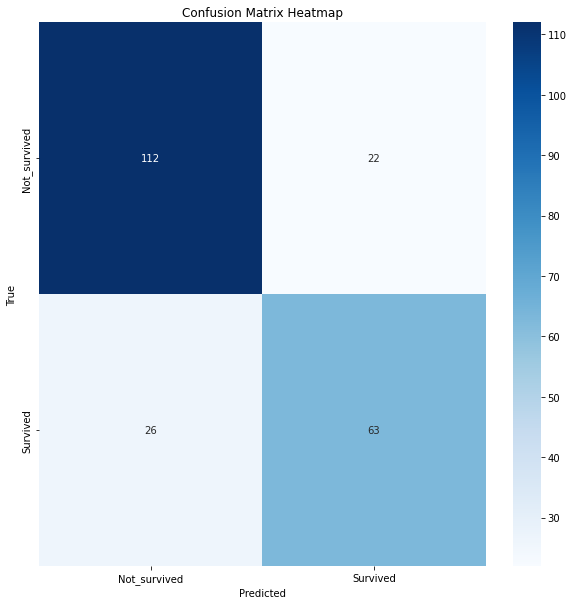

In [122]:
# 클래스 레이블 설정 (0: 비생존, 1: 생존)
class_labels = ['Not_survived', 'Survived']

# 히트맵 그리기
import matplotlib.pyplot as plt

plt.figure(figsize = (10, 10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix Heatmap')
plt.show()

In [123]:
# 전체예측(양성,음성)에서 정답을 잘 맞춘 것
accuracy = (TP+TN) / (TN+FP+FN+TP)  # 정확도 계산공식
print('정확도(accuracy) =', accuracy)

정확도(accuracy)= 0.7847533632286996


In [124]:
# '양성으로 예측'한 것 중, '실제 양성'인 것
precision = TP / (TP + FP)
print('정밀도(precision) =', precision)

정밀도(precision)= 0.7411764705882353


In [125]:
# '실제 음성'인데, '예측을 음성'이라고 한 것
specificity = TN / (TN + FP)
print('특이도(specificity) =', specificity)

특이도(specificity) = 0.835820895522388


In [126]:
# '실제 양성'인데, '예측을 양성'이라고 한 것
sensitivity = TP / (TP + FN)
print('민감도(재현율,Recall,sensitivity) =', sensitivity)

민감도(재현율,Recall,sensitivity) = 0.7078651685393258


In [127]:
# '음성으로 예측'한 것들 중, '실제 음성'인 것
NPV = TN / (TN + FN)
print('음성예측가치(NPV) =', NPV)

음성예측가치(NPV) = 0.8115942028985508


In [128]:
# '실제 양성'중에서 '예측을 음성'으로 분류한 비율
FNR = FN / (TN + FN)
print('FNR =', FNR)

FNR = 0.18840579710144928


In [129]:
# '실제 양성' 중에서 '예측을 양성'으로 분류한 비율
TPR = TP / (TP + FN)
print('TPR =', TPR)

TPR = 0.7078651685393258


In [130]:
# '실제 음성' 중에서 '예측을 양성'으로 분류한 비율
FPR = FP / (TN + FP)
print('FPR =', FPR)

FPR = 0.16417910447761194


In [131]:
# 조화 평균(정밀도와 민감도를 이용한 점수)
f1_score = 2 * ((precision * sensitivity) / (precision + sensitivity))
print('f1-score(조화평균) =', f1_score)

f1-score(조화평균) = 0.7241379310344828


In [151]:
# test data의 예측 확률을 얻음
y_prob = lr.predict_proba(y_train)[:, 1]  # 클래스1(생존)에 대한 예측 확률
print('1에 대한 예측 확률 =', y_prob[:15])

1에 대한 예측 확률 = [0.10633523 0.27059009 0.10633523 0.81968717 0.59317979 0.88749032
 0.59317979 0.10633523 0.59317979 0.88749032 0.39162137 0.10633523
 0.59317979 0.10633523 0.27059009]


In [152]:
# 모형 성능 평가 - 평가지표 계산
lr_report = metrics.classification_report(y_test, y_hat)
print(lr_report)

              precision    recall  f1-score   support

           0       0.81      0.84      0.82       134
           1       0.74      0.71      0.72        89

    accuracy                           0.78       223
   macro avg       0.78      0.77      0.77       223
weighted avg       0.78      0.78      0.78       223



In [154]:
lr.score(y_train, y_test)

0.7847533632286996

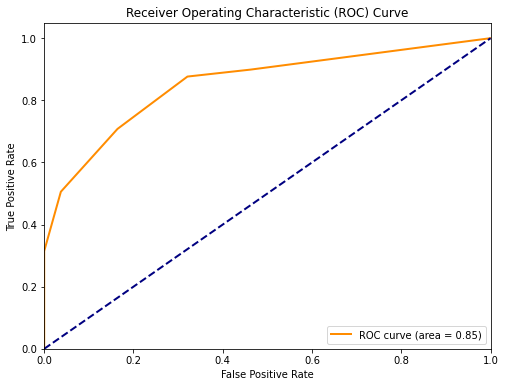

In [155]:
# ROC/AUC 시각화
from sklearn.metrics import roc_curve, auc

y_prob  # 클래스1(생존)에 대한 예측 확률

# ROC 커브 생성
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# AUC 계산
roc_auc = auc(fpr, tpr)

# ROC 커브 그리기
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc = 'lower right')
plt.show()

In [158]:
# 교차검증(Cross Validation)
from sklearn.model_selection import cross_validate

scores = cross_validate(lr, X_train, X_test)
scores

{'fit_time': array([0.0114429 , 0.01293421, 0.00849891, 0.        , 0.        ]),
 'score_time': array([0.00199461, 0.00181413, 0.        , 0.        , 0.        ]),
 'test_score': array([0.76119403, 0.85074627, 0.73880597, 0.76691729, 0.81954887])}

In [160]:
# 교차검증 최종 점수
import numpy as np

np.mean(scores['test_score'])

0.78744248681405

In [164]:
# k-Fold 교차검증
from sklearn.model_selection import StratifiedKFold

scores = cross_validate(lr, X_train, X_test, cv=StratifiedKFold())
np.mean(scores['test_score'])

0.78744248681405

In [167]:
# 폴드 수 조정 (n_splits=)
# from sklearn.model_selection import StratifiedKFold

splitter = StratifiedKFold(n_splits=8, shuffle=True, random_state=42)

scores = cross_validate(lr, X_train, X_test, cv=splitter)
np.mean(scores['test_score'])

0.7873099541021228